## **Outlier Treatment**

Outliers are values that are unusually high or unusually low respect to the rest of the observations of the variable. There are a few techniques for outlier handling:

**1. Outlier removal** : Outlier removal refers to removing outlier observations from the dataset. Outliers, by nature are not abundant, so this procedure should not distort the dataset dramatically. But if there are outliers across multiple variables, we may end up removing a big portion of the dataset.

**2. Treating outliers as missing values** : We can treat outliers as missing information, and carry on any of the imputation methods. 

**3. Discretisation** : Discretisation handles outliers automatically, as outliers are sorted into the terminal bins, together with the other higher or lower value observations. The best approaches are equal frequency and tree based discretisation.

**4. Top / bottom / zero coding** : Top or bottom coding are also known as Winsorisation or outlier capping. The procedure involves capping the maximum and minimum values at a predefined value. This predefined value can be arbitrary, or it can be derived from the variable distribution. If the variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus 3 times the standard deviation. If the variable is skewed, we can use the inter-quantile range proximity rule or cap at the top and bottom percentiles.

*Note: We will be using Titanic dataset for over analysis*

**Identifying outliers**

The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline

os.chdir('/Users/appus/Downloads/Codes')
path=os.getcwd()
print(path)

C:\Users\appus\Downloads\Codes


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,0


In [6]:
# New Copy
df_1= df_titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']].copy()

Text(0.5, 0, 'Fare')

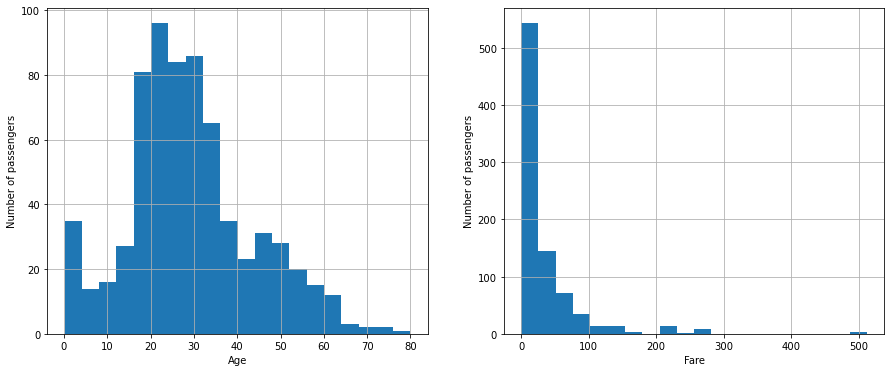

In [10]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df_1.age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = df_1.fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

*Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare.*

In [15]:
# find outliers

# Age
Upper_boundary = df_1.age.mean() + 3* df_1.age.std()
Lower_boundary = df_1.age.mean() - 3* df_1.age.std()
print('Age outliers are values less than {lowerboundary} or greater than {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = df_1.fare.quantile(0.75) - df_1.fare.quantile(0.25)
Lower_fence = df_1.fare.quantile(0.25) - (IQR * 3)
Upper_fence = df_1.fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values less than {lowerboundary} or greater than {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values less than -14.166883113027474 or greater than 73.20657749172571
Fare outliers are values less than -61.4168 or greater than 100.3126


For Age variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding

In [17]:
# top-coding the Age variable
df_1.loc[df_1.age>73, 'age'] = 73

In [22]:
df_1.age.max()

73.0

The outliers in fare, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets. Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding.

In [18]:
# top-coding: capping the variable Fare at 100
df_1.loc[df_1.fare>100, 'fare'] = 100

In [21]:
df_1.fare.max()

100.0

## Date and Time Engineering

Date variables are special type of categorical variable. By their own nature, date variables will contain a multitude of different labels, each one corresponding to a specific date and sometimes time. Date variables, when preprocessed properly can highly enrich a dataset. For example, from a date variable we can extract:

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr
- Time differences in years, months, days, hrs, etc.

In [33]:
df_2=pd.read_csv('accepted_2007_to_2018Q4.csv', nrows=1000)
df_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_2=df_2[['issue_d', 'last_pymnt_d']]
df_2.head()

,issue_d,last_pymnt_d
0,Dec-2015,Jan-2019
1,Dec-2015,Jun-2016
2,Dec-2015,Jun-2017
3,Dec-2015,Feb-2019
4,Dec-2015,Jul-2016


In [34]:
# now let's parse the dates, currently coded as strings, into datetime format

df_2['issue_dt'] = pd.to_datetime(df_2.issue_d)
df_2['last_pymnt_dt'] = pd.to_datetime(df_2.last_pymnt_d)

df_2[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2015,2015-12-01,Jan-2019,2019-01-01
1,Dec-2015,2015-12-01,Jun-2016,2016-06-01
2,Dec-2015,2015-12-01,Jun-2017,2017-06-01
3,Dec-2015,2015-12-01,Feb-2019,2019-02-01
4,Dec-2015,2015-12-01,Jul-2016,2016-07-01


In [35]:
# Extracting Month from date

df_2['issue_dt_month'] = df_2['issue_dt'].dt.month
df_2[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2015-12-01,12
1,2015-12-01,12
2,2015-12-01,12
3,2015-12-01,12
4,2015-12-01,12


In [38]:
# Extracting quarter from date

df_2['issue_dt_quarter'] = df_2['issue_dt'].dt.quarter
df_2[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2015-12-01,4
1,2015-12-01,4
2,2015-12-01,4
3,2015-12-01,4
4,2015-12-01,4


In [39]:
# Extracting day of week from date

df_2['issue_dt_dow'] = df_2['issue_dt'].dt.dayofweek
df_2[['issue_dt', 'issue_dt_dow']].head()

,issue_dt,issue_dt_dow
0,2015-12-01,1
1,2015-12-01,1
2,2015-12-01,1
3,2015-12-01,1
4,2015-12-01,1


In [42]:
# Extracting day of week from date

df_2['issue_dt_year'] = df_2['issue_dt'].dt.year
df_2[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2015-12-01,2015
1,2015-12-01,2015
2,2015-12-01,2015
3,2015-12-01,2015
4,2015-12-01,2015
